In [1]:
#Clean the data
import os
from numpy import genfromtxt
import pandas as pd



dataDir = '/home/noah/Datasets/CoronaTweets'
data = os.path.join(dataDir, 'coronaTest.csv')
df = pd.read_csv(data)


In [2]:
df = df.drop(columns = ['Location', 'UserName', 'ScreenName', 'TweetAt'])

In [3]:
df

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [4]:
from keras.preprocessing.text import Tokenizer
allData = df.to_numpy()
samples = allData[:,0]
y = allData[:,1]
maxLen = 20
maxWords = 10000
tok = Tokenizer(num_words = maxWords)
tok.fit_on_texts(samples)
sequences = tok.texts_to_sequences(samples)
oneHot = tok.sequences_to_matrix(sequences, mode='binary')
wordInd = tok.word_index
wordInd

{'the': 1,
 'to': 2,
 '\r\r': 3,
 'and': 4,
 'covid': 5,
 '19': 6,
 'of': 7,
 't': 8,
 'in': 9,
 'co': 10,
 'a': 11,
 'https': 12,
 'coronavirus': 13,
 'food': 14,
 'for': 15,
 'is': 16,
 'i': 17,
 'are': 18,
 'on': 19,
 'you': 20,
 'store': 21,
 'at': 22,
 'this': 23,
 'grocery': 24,
 'stock': 25,
 'people': 26,
 'up': 27,
 'be': 28,
 'have': 29,
 'that': 30,
 'with': 31,
 'we': 32,
 'amp': 33,
 'all': 34,
 'or': 35,
 'it': 36,
 'my': 37,
 'your': 38,
 'not': 39,
 'if': 40,
 'shopping': 41,
 'online': 42,
 'supermarket': 43,
 'out': 44,
 'panic': 45,
 'will': 46,
 'as': 47,
 'no': 48,
 'from': 49,
 'they': 50,
 'prices': 51,
 'but': 52,
 'just': 53,
 'so': 54,
 'can': 55,
 'about': 56,
 'toilet': 57,
 'need': 58,
 'our': 59,
 'paper': 60,
 'like': 61,
 'get': 62,
 'now': 63,
 'what': 64,
 'more': 65,
 'covid19': 66,
 'their': 67,
 'buying': 68,
 'has': 69,
 'who': 70,
 'do': 71,
 'by': 72,
 'me': 73,
 'was': 74,
 'how': 75,
 'going': 76,
 'go': 77,
 'some': 78,
 'please': 79,
 'local'

In [5]:
#One hot get rids of time aspect of data 
from keras.preprocessing.sequence import pad_sequences
maxLen = max([len(sequence) for sequence in sequences])
print("Max padding that is need is: ", maxLen)
print("Thus the max length of the sequences is ", maxLen)
x = pad_sequences(sequences, maxlen= maxLen)
x.shape

Max padding that is need is:  65
Thus the max length of the sequences is  65


(3798, 65)

In [6]:
import numpy as np
yDict = {}
yDictRev = {}
uniqueYs = np.unique(y)
for i in range(len(uniqueYs)):
    yDictRev[i] = uniqueYs[i]
    yDict[uniqueYs[i]] = i
print("y dictionary: ", yDict)      #As a hyposthesis a scale might make better features
for i in range(len(y)):
    y[i] = yDict[y[i]]
print("To integer categorical", y)
from keras.utils import to_categorical
y = to_categorical(y)

y dictionary:  {'Extremely Negative': 0, 'Extremely Positive': 1, 'Negative': 2, 'Neutral': 3, 'Positive': 4}
To integer categorical [0 4 1 ... 3 0 1]


In [7]:
def oneHotToCat(vector):
    arg = np.argmax(vector)
    return yDictRev[arg]

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(maxWords, 8, input_length = maxLen))
model.add(Flatten())
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(x,y,epochs = 100, validation_split = 0.1)
hist = hist.history

Epoch 1/100
107/107 [==============================] - 0s 2ms/step - loss: 1.5550 - accuracy: 0.2680 - val_loss: 1.5476 - val_accuracy: 0.2605
Epoch 2/100
107/107 [==============================] - 0s 960us/step - loss: 1.4923 - accuracy: 0.3327 - val_loss: 1.5291 - val_accuracy: 0.2763
Epoch 3/100
107/107 [==============================] - 0s 964us/step - loss: 1.4537 - accuracy: 0.4032 - val_loss: 1.5221 - val_accuracy: 0.2500
Epoch 4/100
107/107 [==============================] - 0s 989us/step - loss: 1.4122 - accuracy: 0.4807 - val_loss: 1.5153 - val_accuracy: 0.2816
Epoch 5/100
107/107 [==============================] - 0s 1ms/step - loss: 1.3599 - accuracy: 0.5190 - val_loss: 1.5090 - val_accuracy: 0.2789
Epoch 6/100
107/107 [==============================] - 0s 971us/step - loss: 1.2954 - accuracy: 0.5945 - val_loss: 1.5046 - val_accuracy: 0.2895
Epoch 7/100
107/107 [==============================] - 0s 986us/step - loss: 1.2219 - accuracy: 0.6431 - val_loss: 1.4931 - val_accura

107/107 [==============================] - 0s 971us/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 3.4042 - val_accuracy: 0.3237
Epoch 58/100
107/107 [==============================] - 0s 960us/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 3.4653 - val_accuracy: 0.3289
Epoch 59/100
107/107 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 3.5342 - val_accuracy: 0.3316
Epoch 60/100
107/107 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 3.5767 - val_accuracy: 0.3237
Epoch 61/100
107/107 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 3.6660 - val_accuracy: 0.3316
Epoch 62/100
107/107 [==============================] - 0s 975us/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 3.7072 - val_accuracy: 0.3263
Epoch 63/100
107/107 [==============================] - 0s 970us/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 3.7623 - val_accuracy: 0.32

<Figure size 432x288 with 0 Axes>

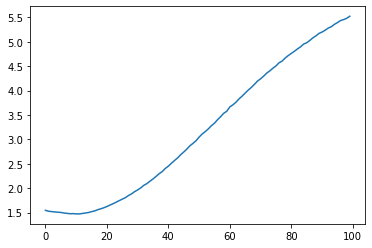

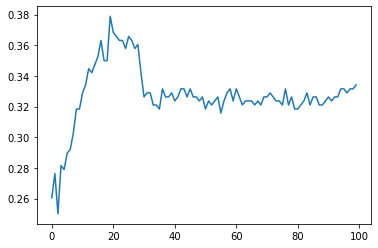

<Figure size 432x288 with 0 Axes>

In [9]:

import matplotlib.pyplot as plt
plt.plot(range(len(hist['val_loss'])),hist['val_loss'])
plt.figure()
plt.plot(range(len(hist['val_accuracy'])),hist['val_accuracy'])
plt.figure()

In [10]:
def testModel(embeddingN):
    model = Sequential()
    model.add(Embedding(maxWords, embeddingN, input_length = maxLen))
    model.add(Flatten())
    model.add(Dense(5, activation = 'softmax'))
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    hist = model.fit(x,y,epochs = 10, validation_split = 0.1)
    hist = hist.history
    return hist

In [305]:
maxAcc = []
for i in range(1,100):
    hist = testModel(i)
    maxAcc.append(max(hist['val_accuracy']))



Epoch 1/10
107/107 [==============================] - 0s 2ms/step - loss: 1.5854 - accuracy: 0.2580 - val_loss: 1.5766 - val_accuracy: 0.2500
Epoch 2/10
107/107 [==============================] - 0s 846us/step - loss: 1.5497 - accuracy: 0.2835 - val_loss: 1.5621 - val_accuracy: 0.2474
Epoch 3/10
107/107 [==============================] - 0s 816us/step - loss: 1.5252 - accuracy: 0.2996 - val_loss: 1.5414 - val_accuracy: 0.2711
Epoch 4/10
107/107 [==============================] - 0s 860us/step - loss: 1.5019 - accuracy: 0.3332 - val_loss: 1.5255 - val_accuracy: 0.2658
Epoch 5/10
107/107 [==============================] - 0s 803us/step - loss: 1.4840 - accuracy: 0.3452 - val_loss: 1.5153 - val_accuracy: 0.2737
Epoch 6/10
107/107 [==============================] - 0s 869us/step - loss: 1.4705 - accuracy: 0.3596 - val_loss: 1.5124 - val_accuracy: 0.2921
Epoch 7/10
107/107 [==============================] - 0s 808us/step - loss: 1.4587 - accuracy: 0.3736 - val_loss: 1.5096 - val_accuracy: 0

107/107 [==============================] - 0s 958us/step - loss: 1.2127 - accuracy: 0.6434 - val_loss: 1.4947 - val_accuracy: 0.3158
Epoch 9/10
107/107 [==============================] - 0s 888us/step - loss: 1.1416 - accuracy: 0.6755 - val_loss: 1.4867 - val_accuracy: 0.3000
Epoch 10/10
107/107 [==============================] - 0s 884us/step - loss: 1.0666 - accuracy: 0.7106 - val_loss: 1.4950 - val_accuracy: 0.2895
Epoch 1/10
107/107 [==============================] - 0s 2ms/step - loss: 1.5709 - accuracy: 0.2683 - val_loss: 1.5646 - val_accuracy: 0.2368
Epoch 2/10
107/107 [==============================] - 0s 982us/step - loss: 1.5068 - accuracy: 0.3215 - val_loss: 1.5260 - val_accuracy: 0.2737
Epoch 3/10
107/107 [==============================] - 0s 940us/step - loss: 1.4629 - accuracy: 0.3909 - val_loss: 1.5193 - val_accuracy: 0.2842
Epoch 4/10
107/107 [==============================] - 0s 943us/step - loss: 1.4242 - accuracy: 0.4377 - val_loss: 1.5139 - val_accuracy: 0.2921
Epoc

Epoch 3/10
107/107 [==============================] - 0s 1ms/step - loss: 1.4213 - accuracy: 0.4734 - val_loss: 1.5178 - val_accuracy: 0.2789
Epoch 4/10
107/107 [==============================] - 0s 1ms/step - loss: 1.3440 - accuracy: 0.5606 - val_loss: 1.5037 - val_accuracy: 0.3026
Epoch 5/10
107/107 [==============================] - 0s 1ms/step - loss: 1.2408 - accuracy: 0.6635 - val_loss: 1.4912 - val_accuracy: 0.3237
Epoch 6/10
107/107 [==============================] - 0s 1ms/step - loss: 1.1166 - accuracy: 0.7358 - val_loss: 1.4785 - val_accuracy: 0.3395
Epoch 7/10
107/107 [==============================] - 0s 1ms/step - loss: 0.9796 - accuracy: 0.7820 - val_loss: 1.4638 - val_accuracy: 0.3474
Epoch 8/10
107/107 [==============================] - 0s 1ms/step - loss: 0.8401 - accuracy: 0.8370 - val_loss: 1.4630 - val_accuracy: 0.3553
Epoch 9/10
107/107 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.8736 - val_loss: 1.4647 - val_accuracy: 0.3500
Epoch 

Epoch 8/10
107/107 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.9114 - val_loss: 1.4781 - val_accuracy: 0.3474
Epoch 9/10
107/107 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.9377 - val_loss: 1.4961 - val_accuracy: 0.3474
Epoch 10/10
107/107 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.9643 - val_loss: 1.5257 - val_accuracy: 0.3474
Epoch 1/10
107/107 [==============================] - 0s 3ms/step - loss: 1.5387 - accuracy: 0.2899 - val_loss: 1.5229 - val_accuracy: 0.2711
Epoch 2/10
107/107 [==============================] - 0s 2ms/step - loss: 1.4565 - accuracy: 0.3929 - val_loss: 1.5257 - val_accuracy: 0.2895
Epoch 3/10
107/107 [==============================] - 0s 2ms/step - loss: 1.3737 - accuracy: 0.5334 - val_loss: 1.5095 - val_accuracy: 0.3263
Epoch 4/10
107/107 [==============================] - 0s 2ms/step - loss: 1.2466 - accuracy: 0.6530 - val_loss: 1.4836 - val_accuracy: 0.3395
Epoch

Epoch 3/10
107/107 [==============================] - 0s 2ms/step - loss: 1.3334 - accuracy: 0.5840 - val_loss: 1.5004 - val_accuracy: 0.3184
Epoch 4/10
107/107 [==============================] - 0s 2ms/step - loss: 1.1683 - accuracy: 0.7168 - val_loss: 1.4906 - val_accuracy: 0.3579
Epoch 5/10
107/107 [==============================] - 0s 2ms/step - loss: 0.9673 - accuracy: 0.7937 - val_loss: 1.4743 - val_accuracy: 0.3368
Epoch 6/10
107/107 [==============================] - 0s 2ms/step - loss: 0.7577 - accuracy: 0.8724 - val_loss: 1.4730 - val_accuracy: 0.3474
Epoch 7/10
107/107 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.9225 - val_loss: 1.4903 - val_accuracy: 0.3500
Epoch 8/10
107/107 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.9585 - val_loss: 1.5195 - val_accuracy: 0.3447
Epoch 9/10
107/107 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9710 - val_loss: 1.5430 - val_accuracy: 0.3579
Epoch 

Epoch 8/10
107/107 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.9687 - val_loss: 1.5162 - val_accuracy: 0.3658
Epoch 9/10
107/107 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9839 - val_loss: 1.5568 - val_accuracy: 0.3553
Epoch 10/10
107/107 [==============================] - 0s 2ms/step - loss: 0.1302 - accuracy: 0.9906 - val_loss: 1.6135 - val_accuracy: 0.3447
Epoch 1/10
107/107 [==============================] - 0s 3ms/step - loss: 1.5303 - accuracy: 0.2917 - val_loss: 1.5252 - val_accuracy: 0.2632
Epoch 2/10
107/107 [==============================] - 0s 2ms/step - loss: 1.4262 - accuracy: 0.4468 - val_loss: 1.5136 - val_accuracy: 0.2868
Epoch 3/10
107/107 [==============================] - 0s 2ms/step - loss: 1.2869 - accuracy: 0.6103 - val_loss: 1.4980 - val_accuracy: 0.3105
Epoch 4/10
107/107 [==============================] - 0s 2ms/step - loss: 1.0846 - accuracy: 0.7583 - val_loss: 1.4773 - val_accuracy: 0.3263
Epoch

Epoch 3/10
107/107 [==============================] - 0s 3ms/step - loss: 1.2493 - accuracy: 0.6568 - val_loss: 1.4857 - val_accuracy: 0.3237
Epoch 4/10
107/107 [==============================] - 0s 3ms/step - loss: 1.0151 - accuracy: 0.7771 - val_loss: 1.4460 - val_accuracy: 0.3368
Epoch 5/10
107/107 [==============================] - 0s 3ms/step - loss: 0.7599 - accuracy: 0.8719 - val_loss: 1.4390 - val_accuracy: 0.3368
Epoch 6/10
107/107 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.9295 - val_loss: 1.4418 - val_accuracy: 0.3421
Epoch 7/10
107/107 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.9605 - val_loss: 1.4698 - val_accuracy: 0.3553
Epoch 8/10
107/107 [==============================] - 0s 3ms/step - loss: 0.2222 - accuracy: 0.9813 - val_loss: 1.4947 - val_accuracy: 0.3474
Epoch 9/10
107/107 [==============================] - 0s 3ms/step - loss: 0.1356 - accuracy: 0.9909 - val_loss: 1.5460 - val_accuracy: 0.3289
Epoch 

Epoch 8/10
107/107 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.9865 - val_loss: 1.5701 - val_accuracy: 0.3658
Epoch 9/10
107/107 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.9927 - val_loss: 1.6275 - val_accuracy: 0.3500
Epoch 10/10
107/107 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9959 - val_loss: 1.6970 - val_accuracy: 0.3632
Epoch 1/10
107/107 [==============================] - 0s 4ms/step - loss: 1.5254 - accuracy: 0.2891 - val_loss: 1.5310 - val_accuracy: 0.2737
Epoch 2/10
107/107 [==============================] - 0s 3ms/step - loss: 1.4042 - accuracy: 0.4710 - val_loss: 1.5213 - val_accuracy: 0.3053
Epoch 3/10
107/107 [==============================] - 0s 3ms/step - loss: 1.2177 - accuracy: 0.6820 - val_loss: 1.4822 - val_accuracy: 0.3263
Epoch 4/10
107/107 [==============================] - 0s 3ms/step - loss: 0.9556 - accuracy: 0.8122 - val_loss: 1.4696 - val_accuracy: 0.3684
Epoch

Epoch 3/10
107/107 [==============================] - 0s 4ms/step - loss: 1.1746 - accuracy: 0.6943 - val_loss: 1.4750 - val_accuracy: 0.2921
Epoch 4/10
107/107 [==============================] - 0s 3ms/step - loss: 0.8913 - accuracy: 0.8274 - val_loss: 1.4440 - val_accuracy: 0.3395
Epoch 5/10
107/107 [==============================] - 0s 4ms/step - loss: 0.6057 - accuracy: 0.9160 - val_loss: 1.4604 - val_accuracy: 0.3421
Epoch 6/10
107/107 [==============================] - 0s 3ms/step - loss: 0.3811 - accuracy: 0.9590 - val_loss: 1.4843 - val_accuracy: 0.3553
Epoch 7/10
107/107 [==============================] - 0s 4ms/step - loss: 0.2246 - accuracy: 0.9801 - val_loss: 1.5280 - val_accuracy: 0.3526
Epoch 8/10
107/107 [==============================] - 0s 4ms/step - loss: 0.1272 - accuracy: 0.9903 - val_loss: 1.5927 - val_accuracy: 0.3500
Epoch 9/10
107/107 [==============================] - 0s 4ms/step - loss: 0.0708 - accuracy: 0.9950 - val_loss: 1.6681 - val_accuracy: 0.3500
Epoch 

Epoch 8/10
107/107 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 0.9927 - val_loss: 1.6508 - val_accuracy: 0.3579
Epoch 9/10
107/107 [==============================] - 0s 4ms/step - loss: 0.0545 - accuracy: 0.9965 - val_loss: 1.7405 - val_accuracy: 0.3316
Epoch 10/10
107/107 [==============================] - 0s 4ms/step - loss: 0.0293 - accuracy: 0.9980 - val_loss: 1.8115 - val_accuracy: 0.3237
Epoch 1/10
107/107 [==============================] - 1s 5ms/step - loss: 1.5217 - accuracy: 0.2996 - val_loss: 1.5218 - val_accuracy: 0.2632
Epoch 2/10
107/107 [==============================] - 0s 4ms/step - loss: 1.3785 - accuracy: 0.5099 - val_loss: 1.5160 - val_accuracy: 0.3053
Epoch 3/10
107/107 [==============================] - 0s 4ms/step - loss: 1.1466 - accuracy: 0.7232 - val_loss: 1.4747 - val_accuracy: 0.3132
Epoch 4/10
107/107 [==============================] - 0s 4ms/step - loss: 0.8395 - accuracy: 0.8479 - val_loss: 1.4453 - val_accuracy: 0.3474
Epoch

In [306]:
print(np.argmax(maxAcc))

53


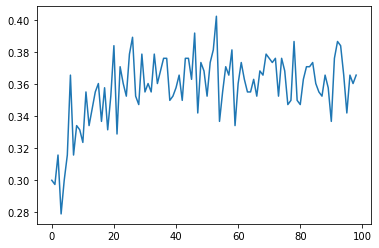

In [307]:
plt.plot(maxAcc)

In [338]:
#Looks like levels off at using 32 dimensions for LSTM...
#Next will try using MAE

allData = df.to_numpy()
for i in range(len(allData[:,1])):
    allData[i,1] =yDictRev[allData[i,1]]


KeyError: 'Extremely Negative'

In [17]:
scaleDict = {
    'Extremely Negative':-2,
    'Negative': -1,
    'Neutral': 0,
    'Positive':1,
    'Extremely Positive':2
}




In [18]:
for i, sentiment in enumerate(allData[:,1]):
    allData[i,1] = scaleDict[sentiment]

KeyError: 0

In [341]:
allData

array([['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1',
        -2],
       ["When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",
        1],
       ['Find out how you can protect yourself and loved ones from #coronavirus. ?',
        2],
       ...,
       ["Asst Prof of Economics @cconces was on @NBCPhiladelphia talking about her recent research on coronavirus' impact on the economy. Watch it here (starting at :33): https://t.co/8tfYNoro5l",
        0],
       ["Gov need to do somethings instead of biar je rakyat assume 'lockdown' ke or even worst. Harini semua supermarket crowded like hell. Lagi mudah virus tu tersebar ?? #COVID2019",
        -2],
       ['I an

In [15]:
maxWords = 10000
samples = allData[:,0]
tok = Tokenizer(num_words = maxWords)
tok.fit_on_texts(samples)
sequences = tok.texts_to_sequences(samples)
sequences = pad_sequences(sequences)

In [16]:
x = sequences
y = allData[:,1]

In [403]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(maxWords, 32, input_length = 65))
model.add(LSTM(64))

model.add(Dense(1))
model.summary()
#model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])
#model.fit(x,y,epochs = 10, validation_split = 0.1)


Model: "sequential_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_198 (Embedding)    (None, 65, 32)            320000    
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dense_196 (Dense)            (None, 1)                 65        
Total params: 344,897
Trainable params: 344,897
Non-trainable params: 0
_________________________________________________________________


In [404]:
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])

In [406]:
x = np.asarray(x).astype('float32')
y = np.asarray(y).astype('float32')
model.fit(x,y, epochs = 15, validation_split = 0.2)

Epoch 1/15
95/95 [==============================] - 2s 20ms/step - loss: 0.2752 - accuracy: 0.3374 - val_loss: 1.3527 - val_accuracy: 0.2461
Epoch 2/15
95/95 [==============================] - 2s 20ms/step - loss: 0.2176 - accuracy: 0.3542 - val_loss: 1.1431 - val_accuracy: 0.2526
Epoch 3/15
95/95 [==============================] - 2s 21ms/step - loss: 0.1881 - accuracy: 0.3611 - val_loss: 1.0670 - val_accuracy: 0.2500
Epoch 4/15
95/95 [==============================] - 2s 21ms/step - loss: 0.1586 - accuracy: 0.3631 - val_loss: 1.1063 - val_accuracy: 0.2355
Epoch 5/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1380 - accuracy: 0.3637 - val_loss: 1.0589 - val_accuracy: 0.2566
Epoch 6/15
95/95 [==============================] - 2s 21ms/step - loss: 0.1180 - accuracy: 0.3690 - val_loss: 1.0380 - val_accuracy: 0.2632
Epoch 7/15
95/95 [==============================] - 2s 21ms/step - loss: 0.1070 - accuracy: 0.3756 - val_loss: 1.0526 - val_accuracy: 0.2553
Epoch 8/15
95

In [13]:
#Not too great... going to try LSTM with softmax again
data = df.to_numpy()
data

array([['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1',
        0],
       ["When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",
        4],
       ['Find out how you can protect yourself and loved ones from #coronavirus. ?',
        1],
       ...,
       ["Asst Prof of Economics @cconces was on @NBCPhiladelphia talking about her recent research on coronavirus' impact on the economy. Watch it here (starting at :33): https://t.co/8tfYNoro5l",
        3],
       ["Gov need to do somethings instead of biar je rakyat assume 'lockdown' ke or even worst. Harini semua supermarket crowded like hell. Lagi mudah virus tu tersebar ?? #COVID2019",
        0],
       ['I and 

In [14]:
revScale = dict([(value, key) for (key,value) in scaleDict.items()])
for i in range(len(data[:,1])):
    data[i,1] = yDict[data[i,1]]

NameError: name 'scaleDict' is not defined

In [26]:
y = data[:,1]
y = to_categorical(y)
y 

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [39]:
from keras.layers import LSTM,Bidirectional
model = Sequential()
model.add(Embedding(1000, 32, input_length = 60))
model.add(Bidirectional(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2)))
model.add(Dense(5, activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 60, 32)            32000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 645       
Total params: 82,309
Trainable params: 82,309
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [41]:
maxWords = 1000
samples = allData[:,0]
tok = Tokenizer(num_words = maxWords)
tok.fit_on_texts(samples)
sequences = tok.texts_to_sequences(samples)
sequences = pad_sequences(sequences)

In [42]:
model.fit(sequences,y, validation_split = 0.1, epochs = 20)

Epoch 1/20
107/107 [==============================] - 7s 63ms/step - loss: 1.5489 - accuracy: 0.2782 - val_loss: 1.5390 - val_accuracy: 0.2789
Epoch 2/20
107/107 [==============================] - 6s 59ms/step - loss: 1.4827 - accuracy: 0.3218 - val_loss: 1.5577 - val_accuracy: 0.3026
Epoch 3/20
107/107 [==============================] - 6s 59ms/step - loss: 1.4113 - accuracy: 0.3856 - val_loss: 1.4493 - val_accuracy: 0.3789
Epoch 4/20
107/107 [==============================] - 6s 59ms/step - loss: 1.3125 - accuracy: 0.4447 - val_loss: 1.4287 - val_accuracy: 0.3763
Epoch 5/20
107/107 [==============================] - 6s 59ms/step - loss: 1.2159 - accuracy: 0.4982 - val_loss: 1.3616 - val_accuracy: 0.4053
Epoch 6/20
107/107 [==============================] - 6s 59ms/step - loss: 1.1387 - accuracy: 0.5363 - val_loss: 1.3708 - val_accuracy: 0.4053
Epoch 7/20
107/107 [==============================] - 6s 59ms/step - loss: 1.0756 - accuracy: 0.5711 - val_loss: 1.3557 - val_accuracy: 0.4289

array([[   0,    0,    0, ...,    8,   10, 5451],
       [   0,    0,    0, ...,    8,   10, 5454],
       [   0,    0,    0, ...,  669,   49,   13],
       ...,
       [   0,    0,    0, ...,   12,    8,   10],
       [   0,    0,    0, ...,  753,  112,  102],
       [   0,    0,    0, ...,   12,    8,   10]], dtype=int32)